# How does weather affect the amount of people using the station? #

In [3]:
import csv
import itertools
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [72]:
# this will group by Date and Event. then add all Entry for the day. then get rid of data before 2011
def mapper1(row):
    return (row['Event'],row['Date'],row['Entry'])

def reducer1(counts, pair):
    if pair[1].split('/')[2] > '2010':
        counts[pair[0]+' , '+pair[1]] = counts.get(pair[0]+' , '+pair[1], 0)+float(pair[2])
    return counts

with open('dataset/clean-mta-data.csv') as csvfile:
    #right now just use 1000000 data, will run all in cluster
    reader = itertools.islice(csv.DictReader(csvfile), 1000000)
    output1 = sorted(reduce(reducer1, map(mapper1, reader), {}).items())
    
output1[:10] 

[('Fog , Rain , 01/02/2011', 2363065.0),
 ('Fog , Rain , Snow , 01/26/2011', 5040664.0),
 ('Fog , Snow , 01/07/2011', 5083468.0),
 ('Fog , Snow , 01/11/2011', 5315070.0),
 ('Fog , Snow , 01/12/2011', 4226676.0),
 ('Fog , Snow , 01/21/2011', 5207506.0),
 ('Fog , Snow , 01/25/2011', 5182573.0),
 ('Fog , Snow , 01/27/2011', 1728183.0),
 ('Normal , 01/01/2011', 2373353.0),
 ('Normal , 01/03/2011', 5101137.0)]

In [ ]:
import pandas as pd

mta = pd.read_csv("dataset/clean-mta-data/clean-mta-data.csv", sep=',', nrows = 1000000)
mta.to_csv('test-mta-data', index=False, encoding='utf-8')
    

In [141]:
#sum up all the entry by weather
def mapper2(row):
    return row

def reducer2(counts, pair):
    weather = pair[0].split(' , ')
    del weather[-1]
    my_weather = ''
    for i in weather:
        my_weather = my_weather + i + ' , '    
    my_weather = my_weather[:-3]
    counts[my_weather] = counts.get(my_weather,0)+pair[1]
    return counts

output2 = sorted(reduce(reducer2, map(mapper2, output1), {}).items())

output2 

[('Fog , Rain', 2363065.0),
 ('Fog , Rain , Snow', 5040664.0),
 ('Fog , Snow', 26743476.0),
 ('Normal', 65362475.0),
 ('Rain', 5424773.0),
 ('Rain , Snow', 5090273.0),
 ('Snow', 2785091.0)]

In [142]:
# count how many days that have certain weather
def mapper3(row):
    return row

def reducer3(counts, pair):
    weather = pair[0].split(' , ')
    del weather[-1]
    my_weather = ''
    for i in weather:
        my_weather = my_weather + i + ' , '    
    my_weather = my_weather[:-3]
    counts[my_weather] = counts.get(my_weather,0)+1
    return counts

output3 = sorted(reduce(reducer3, map(mapper3, output1), {}).items())

output3 



[('Fog , Rain', 1),
 ('Fog , Rain , Snow', 1),
 ('Fog , Snow', 6),
 ('Normal', 16),
 ('Rain', 1),
 ('Rain , Snow', 1),
 ('Snow', 1)]

In [159]:
#this will get average Entry in day for weather
output4 = []

for i in range(len(output2)):
    output4.append((output2[i][0],output2[i][1]/output3[i][1]))

output4

[('Fog , Rain', 2363065.0),
 ('Fog , Rain , Snow', 5040664.0),
 ('Fog , Snow', 4457246.0),
 ('Normal', 4085154.6875),
 ('Rain', 5424773.0),
 ('Rain , Snow', 5090273.0),
 ('Snow', 2785091.0)]

<Container object of 7 artists>

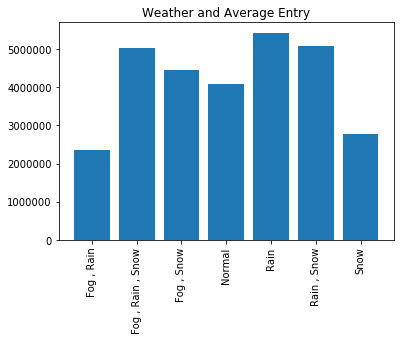

In [188]:
weather_name = []
weather_entry = []
for i in output4:
    weather_name.append(i[0])
    weather_entry.append(i[1])
weather_name = np.array(weather_name)
weather_entry = np.array(weather_entry)
plt.title("Weather and Average Entry")
plt.xticks(range(len(weather_entry)), weather_name, rotation='vertical')
plt.bar(range(0,len(weather_entry)),weather_entry)